In [3]:
import numpy as np

imgs_train = np.load("imgs_train.npy")
imgs_mask_train = np.load("imgs_mask_train.npy")

imgs_train = imgs_train/255
imgs_mask_train[imgs_mask_train==1] = 1
imgs_mask_train[imgs_mask_train==2] = 0
imgs_mask_train[imgs_mask_train==3] = 0

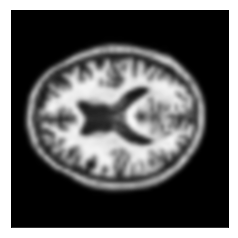

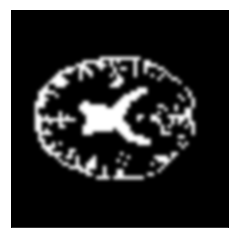

In [4]:
# Display a random training image and its mask

temp_img = imgs_train[5]
temp_mask = imgs_mask_train[5]

temp_img = temp_img.reshape(temp_img.shape[0],temp_img.shape[1])
temp_mask = temp_mask.reshape(temp_mask.shape[0],temp_mask.shape[1])

import cv2
from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow(temp_img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

plt.imshow(temp_mask, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()


In [5]:
# U-net Model
rows = 64
cols = 64

from keras.models import *
from keras.layers import Input, concatenate, merge, Conv2D, MaxPooling2D, UpSampling2D, Dropout, Cropping2D
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras

inputs = Input((rows, cols,1))
conv1 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
conv1 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

conv2 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
conv2 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

up3 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(pool2))
merge3 = concatenate([conv2,up3], axis = 3)
conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge3)

up4 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv3))
merge4 = concatenate([conv1,up4], axis = 3)
conv4 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge4)
#conv4 = Conv2D(2, 3, activation = 'relu', padding = 'same')(conv4)

conv5 = Conv2D(1, 1, activation = 'sigmoid')(conv4)
model = Model(inputs = inputs, outputs = conv5)

model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])

model.summary()

C:\Users\ammarmalik\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 128)  1280        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 64, 64, 128)  147584      conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 32, 32, 128)  0           conv2d_2[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (

In [7]:
h = model.fit(imgs_train,imgs_mask_train, batch_size=32, epochs=20, verbose=2)

Epoch 1/20
 - 0s - loss: 0.1128 - acc: 0.9505
Epoch 2/20
 - 0s - loss: 0.1091 - acc: 0.9513
Epoch 3/20
 - 0s - loss: 0.1078 - acc: 0.9524
Epoch 4/20
 - 0s - loss: 0.1069 - acc: 0.9526
Epoch 5/20
 - 0s - loss: 0.1053 - acc: 0.9522
Epoch 6/20
 - 0s - loss: 0.1025 - acc: 0.9545
Epoch 7/20
 - 0s - loss: 0.1013 - acc: 0.9545
Epoch 8/20
 - 0s - loss: 0.1000 - acc: 0.9554
Epoch 9/20
 - 0s - loss: 0.0993 - acc: 0.9554
Epoch 10/20
 - 0s - loss: 0.0982 - acc: 0.9559
Epoch 11/20
 - 0s - loss: 0.0985 - acc: 0.9557
Epoch 12/20
 - 0s - loss: 0.0963 - acc: 0.9569
Epoch 13/20
 - 0s - loss: 0.0976 - acc: 0.9564
Epoch 14/20
 - 0s - loss: 0.0961 - acc: 0.9566
Epoch 15/20
 - 0s - loss: 0.0943 - acc: 0.9579
Epoch 16/20
 - 0s - loss: 0.0925 - acc: 0.9585
Epoch 17/20
 - 0s - loss: 0.0917 - acc: 0.9592
Epoch 18/20
 - 0s - loss: 0.0922 - acc: 0.9590
Epoch 19/20
 - 0s - loss: 0.0906 - acc: 0.9597
Epoch 20/20
 - 0s - loss: 0.0912 - acc: 0.9593


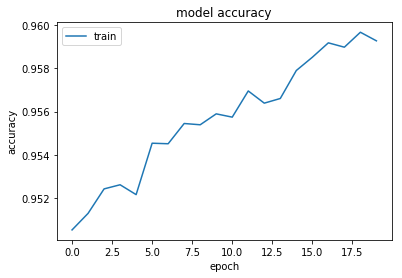

In [9]:
plt.plot(h.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()